In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [45]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
california_df = pd.DataFrame(california_housing['data'], columns=california_housing['feature_names'])
california_df["home_price"] = california_housing.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,home_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   home_price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [47]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,home_price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
Q1 = np.percentile(california_df['Population'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(california_df['Population'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(california_df['Population'] >= (Q3+1.5*IQR))
lower = np.where(california_df['Population'] <= (Q1-1.5*IQR))
 

california_df.drop(upper[0], inplace = True) 
california_df.drop(lower[0], inplace = True)

In [ ]:
Q1 = np.percentile(california_df['AveOccup'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(california_df['AveOccup'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(california_df['AveOccup'] >= (Q3+1.5*IQR))
lower = np.where(california_df['AveOccup'] <= (Q1-1.5*IQR))
 

california_df.drop(upper[0], inplace = True) 
california_df.drop(lower[0], inplace = True)

In [56]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,home_price
count,19442.000000,19442.000000,19442.000000,19442.000000,19442.000000,19442.000000,19442.000000,19442.000000,19442.000000
mean,3.862495,29.320492,5.438774,1.098232,1226.350067,2.920800,35.660379,-119.598653,2.071636
std,1.910105,12.414406,2.525385,0.487839,641.397062,1.072670,2.145297,2.006323,1.165798
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.555675,19.000000,4.449038,1.004115,767.000000,2.417236,33.940000,-121.820000,1.183000
50%,3.525000,30.000000,5.226737,1.048157,1121.000000,2.802901,34.270000,-118.530000,1.796000
75%,4.730600,38.000000,6.045139,1.099972,1596.000000,3.263962,37.730000,-118.030000,2.661750
max,15.000100,52.000000,141.909091,34.066667,3131.000000,63.750000,41.950000,-114.310000,5.000010


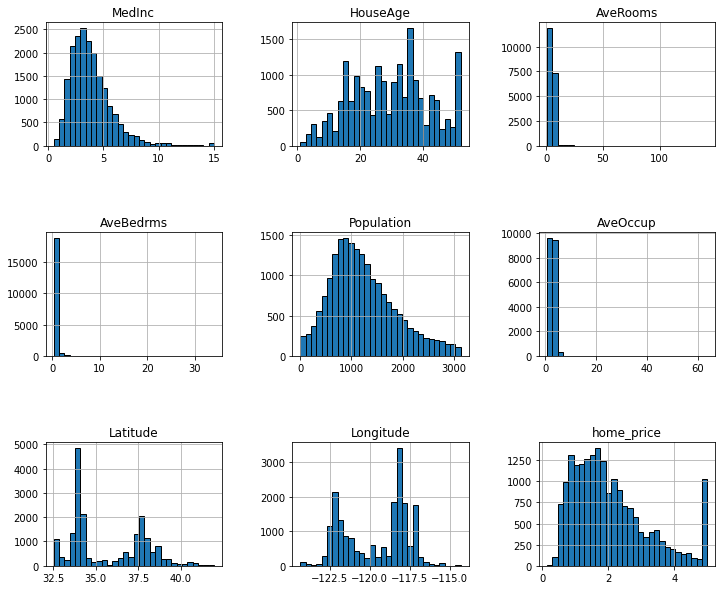

In [57]:
california_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

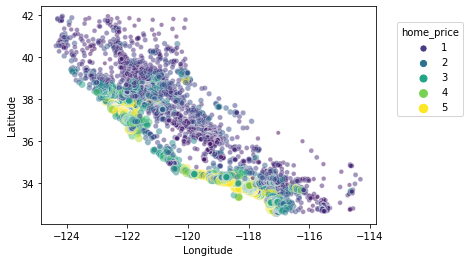

In [58]:
sns.scatterplot(data=california_df, x="Longitude", y="Latitude",
                size="home_price", hue="home_price",
                palette="viridis", alpha=0.5)
plt.legend(title="home_price", bbox_to_anchor=(1.05, 0.95), loc="upper left")

In [59]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(california_df.shape[0]), size=500,
                     replace=False)

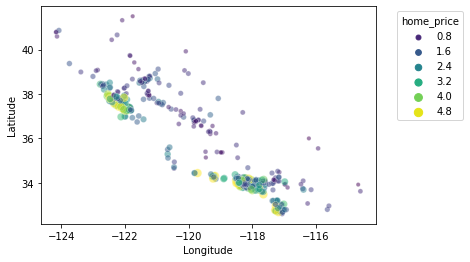

In [60]:
sns.scatterplot(data=california_df.iloc[indices],
                x="Longitude", y="Latitude",
                size="home_price", hue="home_price",
                palette="viridis", alpha=0.5)
plt.legend(title="home_price", bbox_to_anchor=(1.05, 1),
           loc="upper left")

In [61]:
columns_drop = ["Longitude", "Latitude"]
subset = california_df.iloc[indices].drop(columns=columns_drop)
subset["home_price"] = pd.qcut(subset["home_price"], 6, retbins=False)
subset["home_price"] = subset["home_price"].apply(lambda x: x.mid)

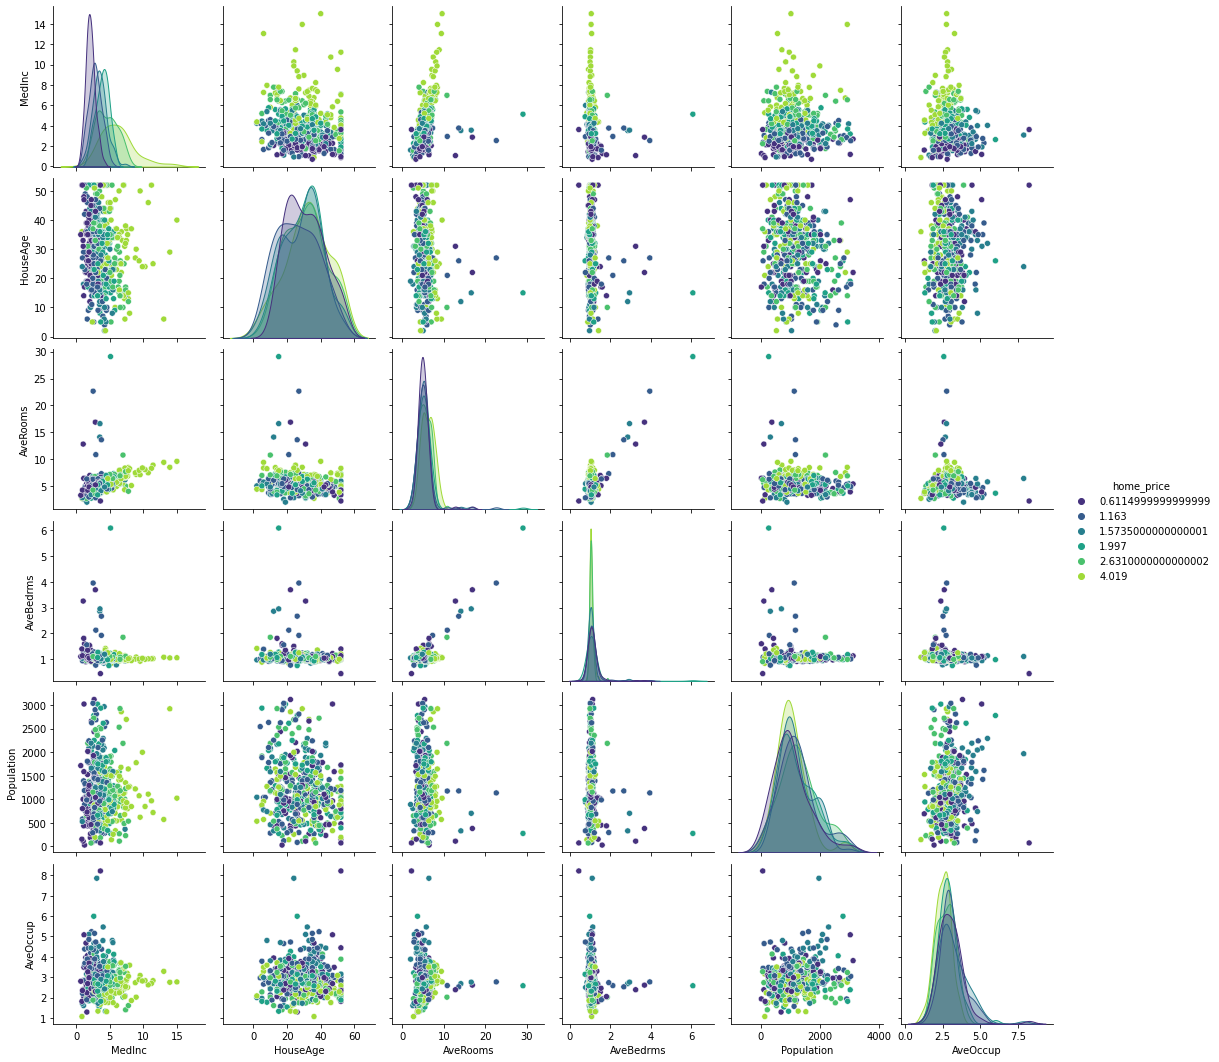

In [62]:
sns.pairplot(data=subset, hue="home_price", palette="viridis")

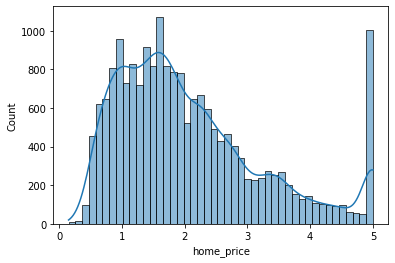

In [63]:
sns.histplot(california_df["home_price"], kde=True)

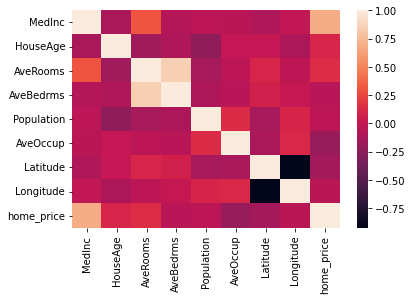

In [64]:
corr_date = california_df.corr()
sns.heatmap(corr_date)

# Train

In [65]:
X = california_df.iloc[:, :-1].values
y = california_df.iloc[:,-1].values

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state=42)

In [67]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(X_train, y_train)

StandardScaler()

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

In [69]:
from sklearn.pipeline import make_pipeline
sgd_model = make_pipeline(preprocessing.StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgd_model.fit(X_train, y_train)

print("SGD intercept california: ", sgd_model[1].intercept_)
print("SGD coef california: ", sgd_model[1].coef_)

SGD intercept california:  [2.06756403]
SGD coef california:  [ 0.78886529  0.10553628 -0.22324491  0.25438506  0.00609661 -0.30396205
 -0.91809277 -0.82750885]


In [70]:
LR_model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
LR_model.fit(X_train, y_train)

print("LR intercept california: ", LR_model[1].intercept_)
print("LR coef california: ", LR_model[1].coef_)

LR intercept california:  2.0672694915127723
LR coef california:  [ 0.8199856   0.12605449 -0.2177995   0.25018062  0.0148838  -0.21401279
 -0.90839783 -0.84754833]


In [71]:
ridge_model = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha=0.9))
ridge_model.fit(X_train, y_train)

print("ridge intercept california: ", ridge_model[1].intercept_)
print("ridge coef california: ", ridge_model[1].coef_)

ridge intercept california:  2.0672694915127727
ridge coef california:  [ 0.81997426  0.12613698 -0.21769798  0.2500092   0.01491858 -0.21401466
 -0.90754511 -0.84669536]


# Evaluation

In [72]:
y_predict_sgd = sgd_model.predict(X_test)

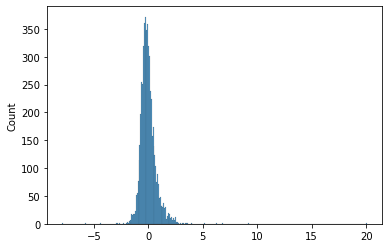

In [73]:
sns.histplot(y_test - y_predict_sgd)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


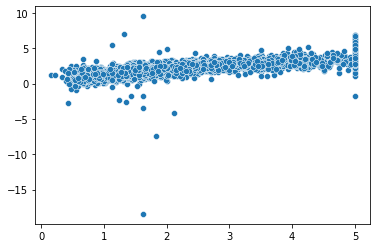

In [74]:
sns.scatterplot(y_test, y_predict_sgd)

In [75]:
from sklearn import metrics

In [76]:
print("MSE SGDRegression: ", metrics.mean_squared_error(y_test, y_predict_sgd))
print("R2_SCORE SGDRegression: ", metrics.r2_score(y_test, y_predict_sgd))
print("MAPE SGDRegression: ", metrics.mean_absolute_percentage_error(y_test, y_predict_sgd))
print("MAE SGDRegression: ", metrics.mean_absolute_error(y_test, y_predict_sgd))

MSE SGDRegression:  0.5769539627716508
R2_SCORE SGDRegression:  0.5742235522711816
MAPE SGDRegression:  0.31272690471520914
MAE SGDRegression:  0.5113448920673636


In [77]:
y_predict_LR = LR_model.predict(X_test)

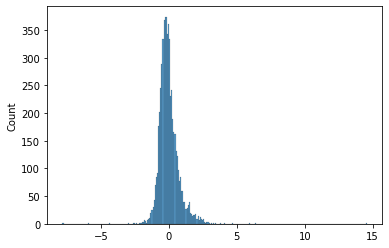

In [78]:
sns.histplot(y_test - y_predict_LR)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


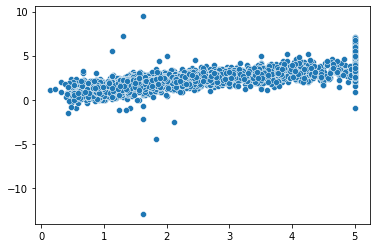

In [79]:
sns.scatterplot(y_test, y_predict_LR)

In [80]:
print("MSE LinearRegression: ", metrics.mean_squared_error(y_test, y_predict_LR))
print("R2_SCORE LinearRgression: ", metrics.r2_score(y_test, y_predict_LR))
print("MAPE LinearRegression: ", metrics.mean_absolute_percentage_error(y_test, y_predict_LR))
print("MAE LinearRegression: ", metrics.mean_absolute_error(y_test, y_predict_LR))

MSE LinearRegression:  0.5303454198340171
R2_SCORE LinearRgression:  0.6086193986060755
MAPE LinearRegression:  0.30794273360615043
MAE LinearRegression:  0.5089955371387935


In [81]:
y_predict_ridge = ridge_model.predict(X_test)

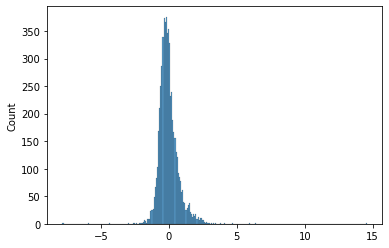

In [82]:
sns.histplot(y_test - y_predict_ridge)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


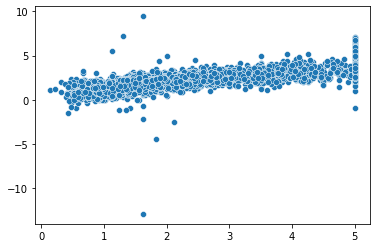

In [83]:
sns.scatterplot(y_test, y_predict_ridge)

In [84]:
print("MSE RidgeRegression: ", metrics.mean_squared_error(y_test, y_predict_ridge))
print("R2_SCORE RidgeRgression: ", metrics.r2_score(y_test, y_predict_ridge))
print("MAPE RidgeRegression: ", metrics.mean_absolute_percentage_error(y_test, y_predict_ridge))
print("MAE RidgeRegression: ", metrics.mean_absolute_error(y_test, y_predict_ridge))

MSE RidgeRegression:  0.5303331845725489
R2_SCORE RidgeRgression:  0.6086284278987073
MAPE RidgeRegression:  0.30793472511130304
MAE RidgeRegression:  0.508992106656251
